In [5]:
# loading the data 
data = pd.read_csv('C:/Users/asus/Downloads/Bank_dataset/AggregatedData.csv')

In [4]:
import pandas as pd

In [9]:
df = pd.DataFrame(data)

In [10]:
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ATM Name                      11589 non-null  object
 1   Transaction Date              11589 non-null  object
 2   No Of Withdrawals             11589 non-null  int64 
 3   No Of XYZ Card Withdrawals    11589 non-null  int64 
 4   No Of Other Card Withdrawals  11589 non-null  int64 
 5   Total amount Withdrawn        11589 non-null  int64 
 6   Amount withdrawn XYZ Card     11589 non-null  int64 
 7   Amount withdrawn Other Card   11589 non-null  int64 
 8   Weekday                       11589 non-null  object
 9   Festival Religion             11589 non-null  object
 10  Working Day                   11589 non-null  object
 11  Holiday Sequence              11589 non-null  object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [27]:
# transaction date into proper datetime 



In [22]:
print(df['Transaction Date'].head())


0    1/1/2011
1    1/1/2011
2    1/1/2011
3    1/1/2011
4    1/1/2011
Name: Transaction Date, dtype: object


In [12]:
print(df['Transaction Date'].dtype)


object


In [13]:

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format ='%d/%m/%Y', errors = 'coerce')

In [14]:
print(df['Transaction Date'].head())


0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: Transaction Date, dtype: datetime64[ns]


In [29]:
# check NAT 
df[df['Transaction Date'].isna()].head()


,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
60,Big Street ATM,NaT,22,12,10,81200,53600,27600,Thursday,NH,W,WWW
61,Mount Road ATM,NaT,184,93,91,506300,323100,183200,Thursday,NH,W,WWW
62,Airport ATM,NaT,103,81,22,411700,356500,55200,Thursday,NH,W,WWW
63,KK Nagar ATM,NaT,223,179,44,771400,649500,121900,Thursday,NH,W,WWW
64,Christ College ATM,NaT,143,52,91,510300,232700,277600,Thursday,NH,W,WWW


In [15]:
# changing working day into boolean vaue rather than H and N
df['Working Day'].head()

0    H
1    H
2    H
3    H
4    H
Name: Working Day, dtype: object

In [16]:
df['Working Day'] = df['Working Day'].map({'H': True, 'N': False})

In [17]:
df['Working Day'].head()

0    True
1    True
2    True
3    True
4    True
Name: Working Day, dtype: object

In [18]:
bad_rows = df[df['Transaction Date'].isna()]


In [19]:
print(bad_rows['Transaction Date'])


60      NaT
61      NaT
62      NaT
63      NaT
64      NaT
         ..
11584   NaT
11585   NaT
11586   NaT
11587   NaT
11588   NaT
Name: Transaction Date, Length: 7032, dtype: datetime64[ns]


In [20]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], format='%m/%d/%Y', errors='coerce')


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
11584          NaT
11585          NaT
11586          NaT
11587          NaT
11588          NaT
Name: Transaction Date, Length: 11589, dtype: datetime64[ns]


In [21]:
# checking sum of isna in transactions date column

df['Transaction Date'].isna().sum()


7032

In [22]:
df = df.dropna(subset=['Transaction Date'])

In [23]:
df['Transaction Date'].isna().sum()


0

In [24]:
# Sorting by Transaction Date
df = df.sort_values('Transaction Date')

In [ ]:
# daily withdrwals 

In [25]:
df_daily = df.groupby('Transaction Date')['Total amount Withdrawn'].sum()
print(df_daily)

Transaction Date
2011-01-01    2628100
2011-01-02    1960100
2011-01-03    3445000
2011-01-04    3206000
2011-01-05    2728900
               ...   
2017-09-08    2563300
2017-09-09    3392000
2017-09-10    1296900
2017-09-11    3095800
2017-09-12    2742400
Name: Total amount Withdrawn, Length: 960, dtype: int64


In [58]:
# Monthly Trends
df['YearMonth'] = df['Transaction Date'].dt.to_period('M')
df_monthy = df.groupby('YearMonth')['Total amount Withdrawn'].sum() as ')['Total amount Withdrawn
print(df_monthy.head())

YearMonth
2011-01    30468200
2011-02    29470800
2011-03    30434900
2011-04    28292900
2011-05    28300400
Freq: M, Name: Total amount Withdrawn, dtype: int64


In [26]:
# Weekday Patterns

df['weekday'] = df['Transaction Date'].dt.day_name()

In [27]:
df.groupby('weekday')['Total amount Withdrawn'].mean().sort_values()

weekday
Sunday       434596.529968
Friday       580843.276662
Tuesday      609992.878788
Thursday     618996.159754
Monday       620728.987730
Wednesday    651686.666667
Saturday     669032.924962
Name: Total amount Withdrawn, dtype: float64

In [61]:
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,Working Day\t,YearMonth,weekday
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,Saturday,H,True,WHH,True,2011-01,Saturday
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,Saturday,C,True,WHH,True,2011-01,Saturday
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,Saturday,C,True,WHH,True,2011-01,Saturday
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,Saturday,C,True,WHH,True,2011-01,Saturday
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,Saturday,C,True,WHH,True,2011-01,Saturday


In [28]:
# unique values in festivals

df['Festival Religion'].unique()


array(['H', 'C', 'NH', 'N', 'M'], dtype=object)

In [29]:
# making more readable the festivlas abbrivations 

df['Festival Religion'] = df['Festival Religion'].map({'H': 'Hindu_festival','C':'Christain_festival','NH':'National_holiday',
                                                        'N': 'Normal_Day','M':'Muslim_festivals'})

In [30]:
df['Festival Religion'].head()

0        Hindu_festival
1    Christain_festival
2    Christain_festival
3    Christain_festival
4    Christain_festival
Name: Festival Religion, dtype: object

In [31]:
df['Festival Religion'].unique()


array(['Hindu_festival', 'Christain_festival', 'National_holiday',
       'Normal_Day', 'Muslim_festivals'], dtype=object)

In [32]:
# checking if any null values there 
df['No Of XYZ Card Withdrawals'].isna().sum()

0

In [38]:
# xyz card vs other cards

df['net_xyz_vs_other_card'] = df['No Of XYZ Card Withdrawals'] - df['No Of Other Card Withdrawals']

In [39]:
df['net_xyz_vs_other_card'].head()

0    -10
1   -119
2     14
3     53
4    -24
Name: net_xyz_vs_other_card, dtype: int64

In [45]:
# Analyze trends:
df.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence,weekday,net_xyz_vs_,net_xyz_vs_other_card
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,Saturday,Hindu_festival,True,WHH,Saturday,-10,-10
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,Saturday,Christain_festival,True,WHH,Saturday,-119,-119
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,Saturday,Christain_festival,True,WHH,Saturday,14,14
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,Saturday,Christain_festival,True,WHH,Saturday,53,53
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,Saturday,Christain_festival,True,WHH,Saturday,-24,-24


In [44]:
df.groupby('YearMonth')['net_xyz_vs_other_card'].sum().plot(kind='bar')

KeyError: 'YearMonth'

In [46]:
print(df['Transaction Date'].dtype)


datetime64[ns]


In [47]:
# Create a new column for Year-Month period
df['YearMonth'] = df['Transaction Date'].dt.to_period('M')


<Axes: xlabel='YearMonth'>

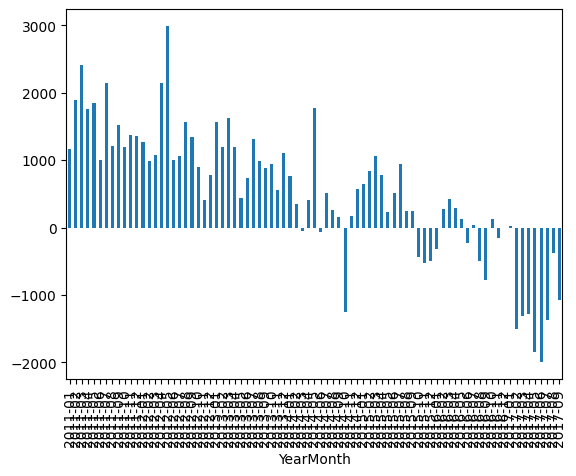

In [48]:
df.groupby('YearMonth')['net_xyz_vs_other_card'].sum().plot(kind='bar')

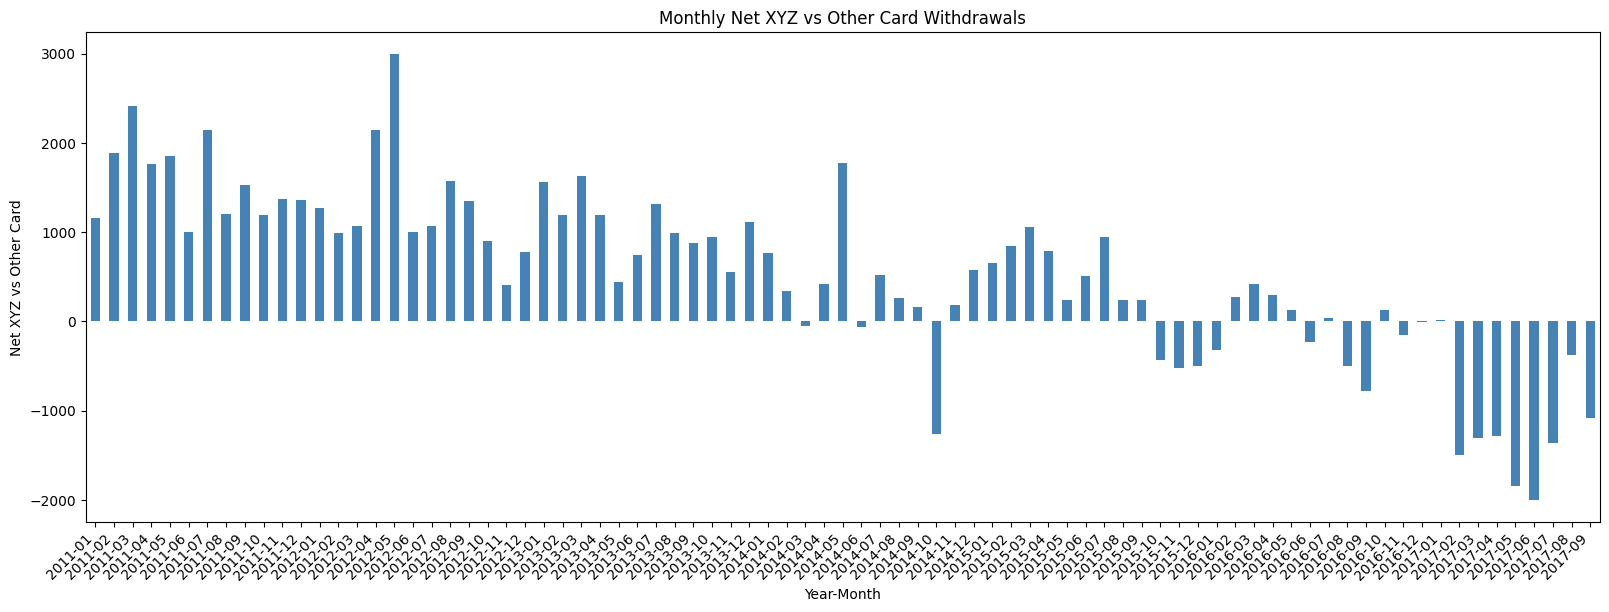

In [49]:
import matplotlib.pyplot as plt

# Convert period to string for plotting
df['YearMonth_str'] = df['YearMonth'].astype(str)

plt.figure(figsize=(16,6))  # bigger figure
(
    df.groupby('YearMonth_str')['net_xyz_vs_other_card']
      .sum()
      .plot(kind='bar', color='steelblue')
)

plt.xticks(rotation=45, ha='right')     # rotate labels
plt.tight_layout()                      # adjust layout
plt.xlabel('Year-Month')
plt.ylabel('Net XYZ vs Other Card')
plt.title('Monthly Net XYZ vs Other Card Withdrawals')
plt.show()


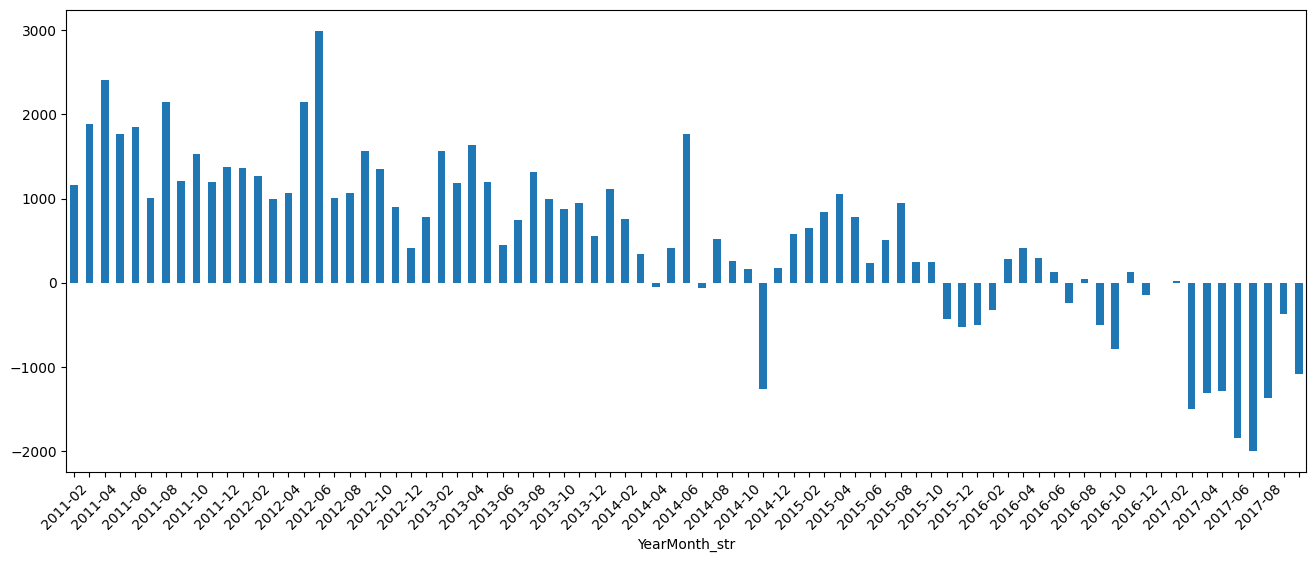

In [50]:
# NOW it is more redable 


ax = df.groupby('YearMonth_str')['net_xyz_vs_other_card'].sum().plot(kind='bar', figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for label in ax.get_xticklabels()[::2]:  # hide every 2nd label
    label.set_visible(False)


In [42]:
# Compare by ATM location

df.groupby('ATM Name')['net_xyz_vs_other_card'].mean().sort_values()

ATM Name
Big Street ATM       -32.767896
Christ College ATM   -29.718884
Mount Road ATM        -9.838202
Airport ATM           45.671249
KK Nagar ATM          74.468085
Name: net_xyz_vs_other_card, dtype: float64

In [43]:
# Compare by festival vs. normal days
df.groupby('Festival Religion')['net_xyz_vs_other_card'].mean()

Festival Religion
Christain_festival    9.333333
Hindu_festival        0.333333
Muslim_festivals      3.000000
National_holiday      9.856605
Normal_Day            5.626374
Name: net_xyz_vs_other_card, dtype: float64

In [52]:
# saving the cleaning data 

df.to_csv(r"C:\Users\asus\Downloads\Bank_dataset\cleaned_transactions.csv", index = False)